<h1 style="color: white; 
    font-size: 46px; 
    text-align: center; 
    background: #00ccff; 
    padding: 30px; 
    ">Quality Report</h1>

In [1]:
from model_image import ModelImage
from functionality import FunctionalityAnalysis

# Functionality

### Image Binary Classification Model with TF dataset

This first example is an image binary classification model trained on the 'cats vs dogs' Kaggle dataset. The data is directly loaded as a TF dataset so there's no need to download it.

Note: There is no need to worry about the size of the images because they will be resized to fit the dimensions of the input layer.

In [2]:
model_path ='./saved_model/image-binary-classification-cats-vs-dogs'
data_tf = 'cats_vs_dogs'

The cell below loads the model and the data. We save the predictions (```y_pred```) and labels (```y_true```) for the functionality analysis.

In [3]:
y_pred, y_true = ModelImage().load_model(model_path).load_data(data_tf=data_tf).predict()

To perform the functionality analysis, run the cell below. Since the model is a binary classification model, this analysis includes the value of the main classification metrics, the confusion matrix and the ROC curve. 

              precision    recall  f1-score   support

           0       1.00      0.87      0.93        46
           1       0.90      1.00      0.95        54

    accuracy                           0.94       100
   macro avg       0.95      0.93      0.94       100
weighted avg       0.95      0.94      0.94       100



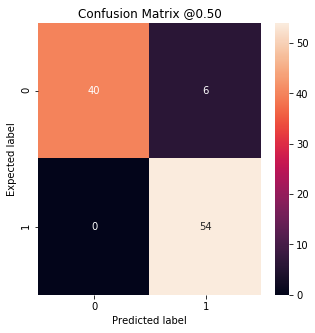

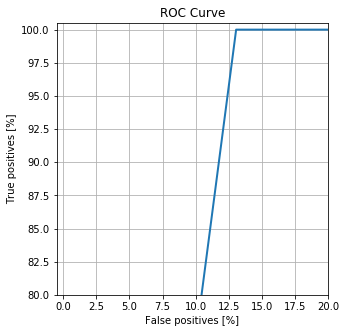

None


In [4]:
FunctionalityAnalysis(y_true, y_pred, 'binary classification').evaluate()

### Image Multiclass Classification with downloaded data

For the next example, we are going to download data passing the argument ```data_url``` to load_data. Once the data is downloaded we can use ```data_dir``` to load the data from the directory.

In [5]:
model_path = './saved_model/flower_photos'
data_url = 'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz'
data_dir = './datasets/flower_photos'

In [6]:
y_pred, y_true = ModelImage().load_model(model_path).load_data(data_dir=data_dir).predict()

Found 3670 files belonging to 5 classes.
Using 100 files for validation.


              precision    recall  f1-score   support

           0       0.85      0.58      0.69        19
           1       0.67      0.78      0.72        23
           2       0.65      0.52      0.58        21
           3       0.58      0.94      0.71        16
           4       0.71      0.57      0.63        21

    accuracy                           0.67       100
   macro avg       0.69      0.68      0.67       100
weighted avg       0.69      0.67      0.66       100



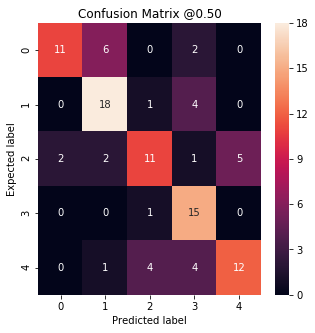

In [7]:
FunctionalityAnalysis(y_true, y_pred, 'multiclass classification').evaluate()

### Regression Model

The model also can address a regression problem. In this case, the functionality analysis will calculate the values of the main regression metrics and plot the expected labels againts the predictions.

mean absolute error              0.08600000000000001
mean squared error               0.00996
coefficient of determination     0.8603888367138111


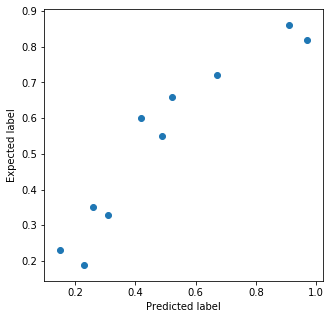

In [8]:
y_true = [0.23, 0.42, 0.97, 0.31, 0.67, 0.26, 0.52, 0.91, 0.15, 0.49]
y_pred = [0.19, 0.60, 0.82, 0.33, 0.72, 0.35, 0.66, 0.86, 0.23, 0.55]

FunctionalityAnalysis(y_true, y_pred, 'regression').evaluate()

# Robustness

Now we are going to analyse the robustness of two Image Multiclass Classification models.

### - Not trained on adversarial examples

In [9]:
model_path ='./saved_model/image-multiclass-mnist-no-robust'
data_tf = 'mnist'

In [10]:
y_pred, y_true = ModelImage().load_model(model_path).load_data(data_tf=data_tf).predict()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00        19
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00        10
           7       1.00      1.00      1.00        12
           8       1.00      1.00      1.00         7
           9       1.00      1.00      1.00        10

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



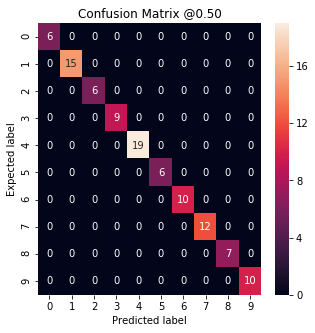

In [11]:
FunctionalityAnalysis(y_true, y_pred, 'multiclass classification').evaluate()